In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [2]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.info()
print("\nMissing Values per Column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB

Missing Values per Colu

In [ ]:
# StudentID is not useful for prediction
if "StudentID" in df.columns:
    df = df.drop(columns=["StudentID"])


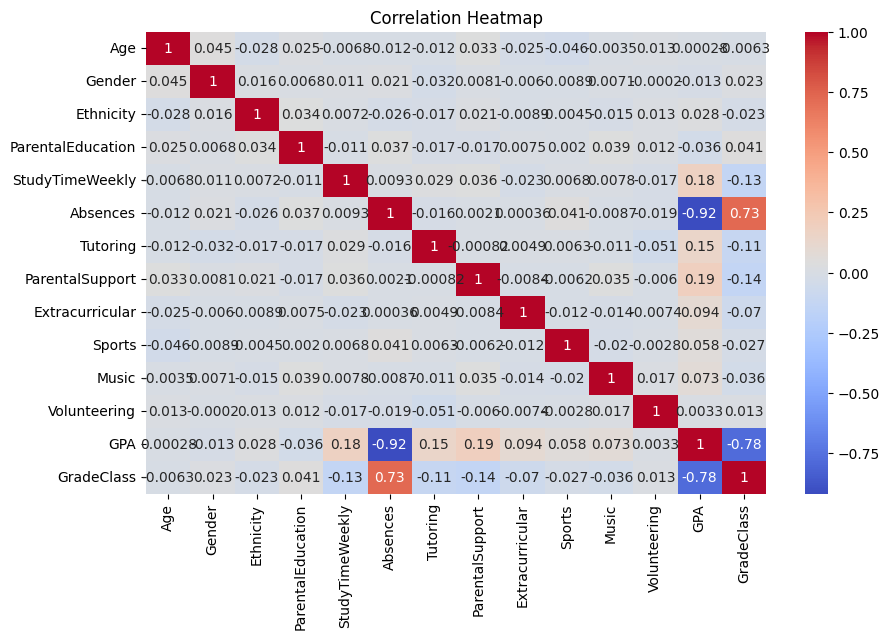

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


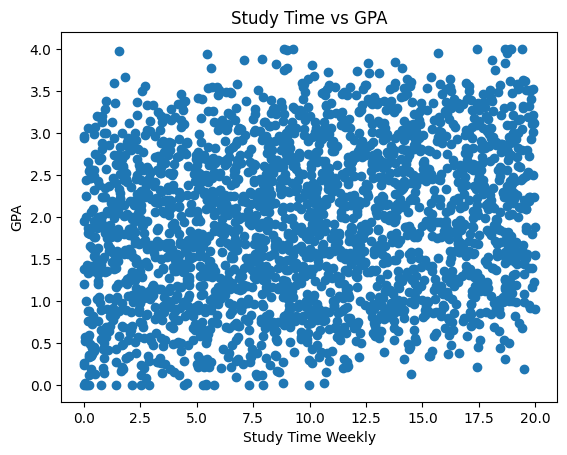

In [6]:
plt.scatter(df["StudyTimeWeekly"], df["GPA"])
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.title("Study Time vs GPA")
plt.show()


In [7]:
# Features
feature_options = [
    "Age","Gender","Ethnicity","ParentalEducation","StudyTimeWeekly",
    "Absences","Tutoring","ParentalSupport","Extracurricular",
    "Sports","Music","Volunteering"
]

X = df[feature_options]
y = df["GPA"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression Results
MSE: 0.038661441494542564
R² Score: 0.9532471681022928


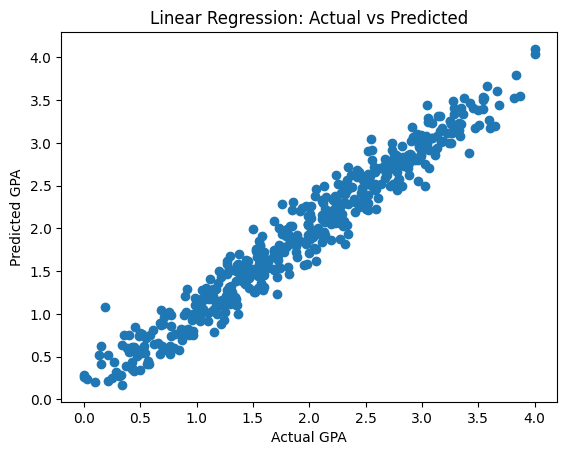

In [9]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results")
print("MSE:", mse_lin)
print("R² Score:", r2_lin)

plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


Polynomial Regression (Degree 2) Results
MSE: 0.04003418554960408
R² Score: 0.9515871246697704


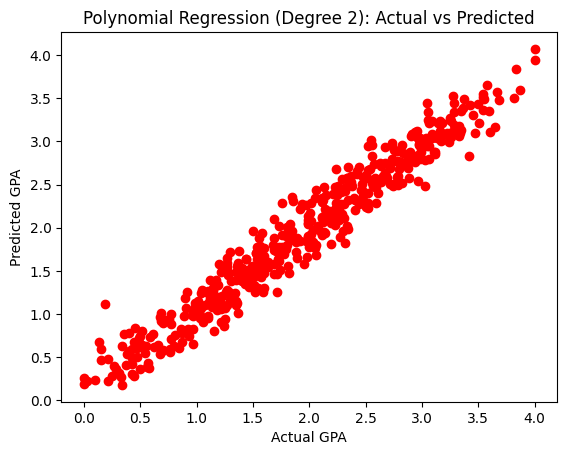

In [10]:
degree = 2  # You can change to 3,4,5 to see effect

poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) Results")
print("MSE:", mse_poly)
print("R² Score:", r2_poly)

plt.scatter(y_test, y_pred_poly, color="red")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title(f"Polynomial Regression (Degree {degree}): Actual vs Predicted")
plt.show()


In [11]:
print("Linear Regression R²:", r2_lin)
print(f"Polynomial Regression (Degree {degree}) R²:", r2_poly)

if r2_poly > r2_lin:
    print("✅ Polynomial Regression performed better!")
else:
    print("ℹ️ Linear Regression performed better or equal.")


Linear Regression R²: 0.9532471681022928
Polynomial Regression (Degree 2) R²: 0.9515871246697704
ℹ️ Linear Regression performed better or equal.


In [12]:
# Example: predict for a new student
new_student = {
    "Age": 17,
    "Gender": 0,
    "Ethnicity": 1,
    "ParentalEducation": 3,
    "StudyTimeWeekly": 12,
    "Absences": 2,
    "Tutoring": 1,
    "ParentalSupport": 3,
    "Extracurricular": 1,
    "Sports": 1,
    "Music": 0,
    "Volunteering": 1
}

new_data = np.array(list(new_student.values())).reshape(1, -1)
lin_pred = lin_model.predict(new_data)[0]
poly_pred = poly_model.predict(poly.transform(new_data))[0]

print("Predicted GPA (Linear):", round(lin_pred,2))
print("Predicted GPA (Polynomial):", round(poly_pred,2))

Predicted GPA (Linear): 3.73
Predicted GPA (Polynomial): 3.69


c:\Users\Abeera Imtiaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Abeera Imtiaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [13]:
import joblib
joblib.dump(lin_model, "linear_model.pkl")
joblib.dump(poly_model, "poly_model.pkl")
joblib.dump(poly, "poly_transform.pkl")


['poly_transform.pkl']